In [9]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-01-30 07:29:13,916: Credentials are already in use. The existing account in the session will be replaced.


In [20]:
n_bits = 20

In [21]:
user1bits = np.random.randint(2,size = n_bits)
user1basis = np.random.choice(["X","Z"],size = n_bits)
user1basis

array(['Z', 'Z', 'X', 'Z', 'Z', 'X', 'Z', 'X', 'X', 'Z', 'Z', 'Z', 'Z',
       'X', 'X', 'X', 'Z', 'Z', 'Z', 'Z'], dtype='<U1')

In [22]:
user2bits = np.random.randint(2,size = n_bits)
user2basis = np.random.choice(["X","Z"],size = n_bits)
user2basis

array(['X', 'X', 'Z', 'X', 'X', 'Z', 'X', 'X', 'X', 'X', 'X', 'Z', 'Z',
       'Z', 'X', 'X', 'X', 'X', 'Z', 'X'], dtype='<U1')

In [23]:
def encode(bits,basis) :
    message = []
    assert len(bits) == len(basis)
    
    for i in range(len(bits)) :
        qc = QuantumCircuit(1,1)
        if basis[i] == "Z" :
            if bits[i] == 0:
                pass
            else :
                qc.x(0)
        else :
            if bits[i] == 0:
                qc.h(0)
            else :
                qc.x(0)
                qc.h(0)
        message.append(qc)
        
    return message

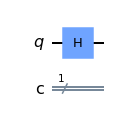

In [24]:
message = encode(user1bits,user1basis)
message[7].draw("mpl")

In [25]:
def measure(message, basis):
    backend = Aer.get_backend('aer_simulator')
    measurements = []
    for q in range(len(basis)):
        if basis[q] == "Z": 
            message[q].measure(0,0)
        else :
            message[q].h(0)
            message[q].measure(0,0)
        aer_sim = Aer.get_backend('aer_simulator')
        qobj = assemble(message[q], shots=1024, memory=True)
        result = aer_sim.run(qobj).result()
        measured_bit = int(result.get_memory()[0])
        measurements.append(measured_bit)
    return measurements

In [26]:
measurements = measure(message,user2basis)

In [27]:
measurements

[1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]

In [28]:
def common_bits(basis1,basis2,measured) :
    common = []
    for i in range(len(basis1)) :
        if basis1[i] == basis2[i] :
            common.append(measured[i])
    return common

In [29]:
user1 = common_bits(user1basis,user2basis,user1bits)
user1

[0, 1, 0, 1, 1, 1, 1]

In [30]:
user2 = common_bits(user1basis,user2basis,measurements)
user2

[0, 1, 0, 1, 1, 1, 1]